In [ ]:
'''1a) the line below is where the section begins.
    initialisation-N = 20000 
    Monte Carlo Loop-for i from 1 to N do 
    Data Calculation-Etot = E1 
    Analysis-Eav = (Etot)
'''


'''1b)
   1)kf=1.381*10^(-23) should be diffrent variable name kf already exists
   2)kT=k*T, K does not exist 
   3)Eav = (Etot) should be (Etot/N)
   4)need another if statement for if (-deltaE/KT)<= rand()
'''

In [203]:
#question 1C
import random
import math
kf=10
nm=10**(-9)
K=1.381*10**(-23)
T=300
def energy_function(x):
    """A simple energy function that we want to sample from."""
    return (kf*(nm**2)*(x**2))/2

def metropolis(energy_function, x0, N):
    """Perform the Metropolis Monte Carlo algorithm.
    
    Arguments:
    energy_function -- the function to be sampled from
    x0 -- the initial position
    num_samples -- the number of samples to generate
    """
    samples = []
    x = x0
    pot_energy_sum = 0.0
    pot_energy_squared_sum = 0.0
    Xtot=0.0
    Xtot2=0.0
    for i in range(N):
        x_new = x + random.uniform(-1,1)*0.15
        pot_energy_difference = energy_function(x_new) - energy_function(x)
        acceptance_probability = min(1, math.exp((-pot_energy_difference)/(K*T)))
        if pot_energy_difference <= 0:
            x=x_new
            samples.append(x)
            pot_energy = energy_function(x_new)
        acceptance_probability = min(1, math.exp((-pot_energy_difference)/(K*T)))
        if pot_energy_difference>0:
            if random.uniform(0, 1) < acceptance_probability:
                x = x_new
                samples.append(x)
                pot_energy = energy_function(x_new)
            if random.uniform(0, 1) >= acceptance_probability:
                x=x
                samples.append(x)
                pot_energy = energy_function(x)
        pot_energy_sum += pot_energy
        pot_energy_squared_sum += pot_energy**2
        Xtot+=x
        Xtot2+=x**2
    avg_pot_energy = pot_energy_sum/N
    avg_pot_energy_squared = pot_energy_squared_sum / N
    #question 2a and 2b
    avgX=Xtot/N
    avgX2=Xtot2/N
    heat_capacity=(avg_pot_energy_squared - avg_pot_energy**2)/(K*T**2)
    return samples, avg_pot_energy, avg_pot_energy_squared, heat_capacity, avgX, avgX2

samples, avg_pot_energy, avg_pot_energy_squared, heat_capacity, avgX, avgX2 = metropolis(energy_function, 0, 20000)
print("Average potential energy: ", avg_pot_energy)
print("Average potential energy squared: ", avg_pot_energy_squared)
print("heat capacity: ", heat_capacity)
print("average x: ",avgX)
print("average x**2: ",avgX2)







Average potential energy:  2.0546418283706833e-21
Average potential energy squared:  1.2768317955768463e-41
heat capacity:  6.876470281501359e-24
average x:  0.0002751985252614889
average x**2:  0.00041092836567413737


In [ ]:
#question 2a and 2b
#the typical value of x is 0.00025 as it is root(KT/kf)
#the typical value of x^2 is 0.00041 which is identical to the KT/kf

In [141]:
#question 1d
from scipy.integrate import quad
import sympy as sp
import numpy as np
kf=10
K=1.381*10**(-23)
T=300
def int_1(x):
    return kf * x**2 * np.exp((-x**2 * kf) / (2 * K * T))

def int_2(x):
    return (np.exp((-x ** 2 * kf)/(2*K*T)))


res, err = quad(int_1, -10**-9, 10**-9)
print(res)

res2, err2 = quad(int_2, -10**-9, 10**-9)
print(res2)

potential=1/2*(res/res2)
print(potential)

2.1299441954873226e-31
5.101678967132715e-11
2.0874933617044218e-21


In [ ]:
# question 3
'''The metropolis monte carlo simulation works as it uses random numbers between 0-1
to sample the system in a way that prefers low energy states. These states are the most 
important to study. These contribtions are most important as most of the occupied states are
at the low energy levels. If the simulation does pick out high energies it is always
accepted at a probibility related to (deltaE/KT). The chance of being accepted decreases
exponentially with higher energies which is why it is biased towards low energies.
This is also important as it eliminates the need for Qn which is thought to be unsolveable'''


0.9234713498624345
1.2052727862958288
1.4280197560111145
1.3486887110492833
1.4120539374517296


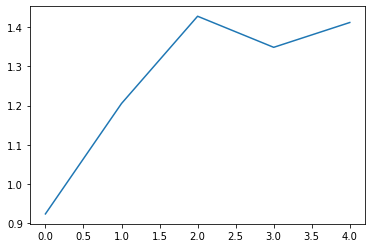

In [198]:
#quetion 4
import matplotlib.pyplot as plt
error_array=[]
samples, avg_pot_energy, avg_pot_energy_squared, heat_capacity, avgX, avgX2 = metropolis(energy_function, 0, 10)
error1=((np.sqrt(K*T**2*heat_capacity))/(avg_pot_energy))
print(error1)
error_array.append(error1)
samples, avg_pot_energy, avg_pot_energy_squared, heat_capacity, avgX, avgX2 = metropolis(energy_function, 0, 100)
error2=((np.sqrt(K*T**2*heat_capacity))/(avg_pot_energy))
print(error2)
error_array.append(error2)
samples, avg_pot_energy, avg_pot_energy_squared, heat_capacity, avgX, avgX2 = metropolis(energy_function, 0, 1000)
error3=((np.sqrt(K*T**2*heat_capacity))/(avg_pot_energy))
print(error3)
error_array.append(error3)
samples, avg_pot_energy, avg_pot_energy_squared, heat_capacity, avgX, avgX2 = metropolis(energy_function, 0, 10000)
error4=((np.sqrt(K*T**2*heat_capacity))/(avg_pot_energy))
print(error4)
error_array.append(error4)
samples, avg_pot_energy, avg_pot_energy_squared, heat_capacity, avgX, avgX2 = metropolis(energy_function, 0, 50000)
error5=((np.sqrt(K*T**2*heat_capacity))/(avg_pot_energy))
print(error5)
error_array.append(error5)
plt_data=np.arange(0,5)
plt.plot(plt_data,error_array)






In [ ]:
'''question 6
i feel i deserve an extra mark due to the solid understanding i now have of the 
metropolis montecarlo simulation as I have done some extra research.'''

In [ ]:
'''self assessment
question 1- i feel like i completed question 1 very well although I am unsure
whether I picked out all the errors correctly, my signposts of the code in question 
1A and the actual simulation I felt i did very well.

question 2- I felt that I coded the extra section well and got correct answers 
however the average positions typical value and the explaination of why stumped me 
I struggled to find much information related and made a logical assumption based off
what I knew.

Question 3- I feel my understanding of the simulation is very good as I spent time researching
it thoroughly.

question 4 - My question 4 was very strange as i did not get the results I expected however 
I feel I coded the equation right. I feel my code for this was very inefficient and could be made
better.

'''
